In [41]:
import pandas as pd

In [47]:
import matplotlib

In [22]:
import geopandas

In [27]:
from shapely.geometry import Point, Polygon

In [5]:
pd.options.display.max_rows = 10

In [50]:
stations = geopandas.read_file("velib-disponibilite-en-temps-reel.geojson")

In [9]:
stations[['name', 'numdocksavailable', 'numbikesavailable', 'geometry']].head()

,name,numdocksavailable,numbikesavailable,geometry
0,None,18,12,None
1,None,33,2,None
2,Athènes - Clichy,13,7,POINT (2.32956021946 48.8781137879)
3,Bassano - Iéna,8,6,POINT (2.29614960099 48.8681445105)
4,None,56,2,None


In [52]:
quartiers = geopandas.read_file("quartier_paris.geojson")

In [33]:
quartiers.head()

,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry
0,750000010,2139.625388,50,2139.535591,10,271750.323937,750000003,7510302,Enfants-Rouges,3,"POLYGON ((2.367101341254551 48.86162755885409,..."
1,750000016,3283.163371,56,3282.999717,16,378252.153674,750000004,7510404,Notre-Dame,4,"POLYGON ((2.361313701339139 48.84858030437791,..."
2,750000018,4052.729521,58,4052.473226,18,798389.398463,750000005,7510502,Jardin-des-Plantes,5,"POLYGON ((2.364561460891576 48.84365746114398,..."
3,750000025,3827.253353,7,3827.053421,25,826559.436780,750000007,7510701,Saint-Thomas-d'Aquin,7,"POLYGON ((2.322133508640103 48.84924973446431,..."
4,750000035,2786.541926,17,2786.448978,35,417335.080621,750000009,7510903,Faubourg-Montmartre,9,"POLYGON ((2.340255299125085 48.87660144727086,..."


In [10]:
type(stations)

geopandas.geodataframe.GeoDataFrame

In [11]:
stations.geometry

0                                     None
1                                     None
2      POINT (2.32956021946 48.8781137879)
3      POINT (2.29614960099 48.8681445105)
4                                     None
5                                     None
6      POINT (2.36682649963 48.8348484529)
7                                     None
8                                     None
9                                     None
10     POINT (2.27435453918 48.8687784918)
11                                    None
12                                    None
13     POINT (2.26825738753 48.8498691876)
14                                    None
15     POINT (2.39607900821 48.8971300531)
16                                    None
17     POINT (2.38654145444 48.8863936794)
18                                    None
19                                    None
20                                    None
21     POINT (2.29924407695 48.8486563159)
22      POINT (2.3278616533 48.8223409659)
23         

In [12]:
type(stations.geometry)

geopandas.geoseries.GeoSeries

In [13]:
type(stations.geometry[2])

shapely.geometry.point.Point

In [18]:
quartiers.geometry.area

0     0.000033
1     0.000046
2     0.000098
3     0.000101
4     0.000051
        ...   
75    0.000225
76    0.000099
77    0.000782
78    0.000203
79    0.000134
Length: 80, dtype: float64

In [19]:
notre_dame = Point(2.35005149954546, 48.85293695)

In [21]:
quartiers.contains(notre_dame)

0     False
1      True
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

In [22]:
quartiers[quartiers.contains(notre_dame)]

,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry
1,750000016,3283.163371,56,3282.999717,16,378252.153674,750000004,7510404,Notre-Dame,4,"POLYGON ((2.361313701339139 48.84858030437791,..."


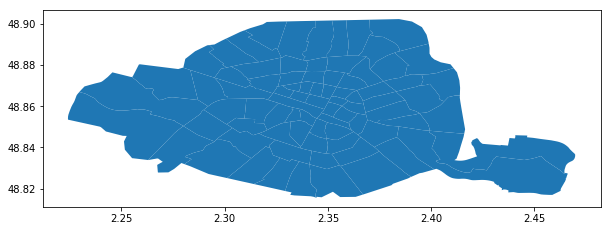

In [29]:
quartiers.plot(figsize=(10, 10))

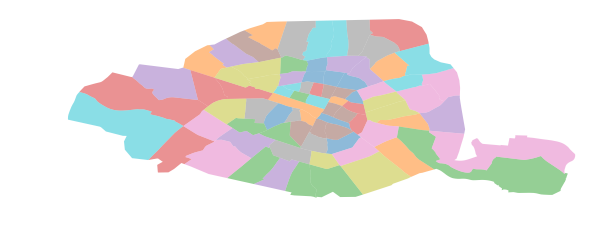

In [24]:
ax = quartiers.plot(figsize=(10, 10), cmap='tab10', alpha=0.5)
ax.set_axis_off()

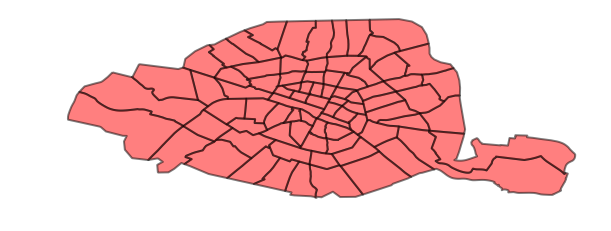

In [25]:
ax = quartiers.plot(figsize=(10, 10), edgecolor='k', facecolor='r', alpha=0.5, linewidth=2)
ax.set_axis_off()

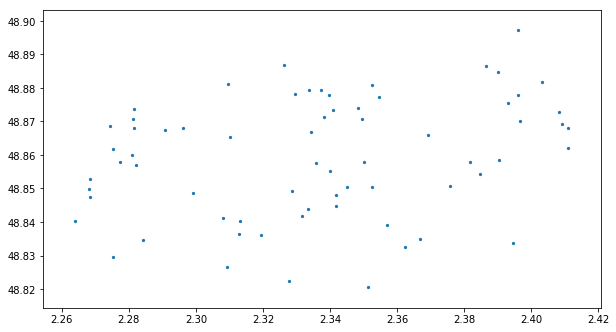

In [18]:
stations.plot(markersize=5, figsize=(10, 10))

In [2]:
streets = geopandas.read_file("openstreetmap_paris/shape/")

In [22]:
streets.head()

,osm_id,name,type,geometry
0,4082329,Bassin de l'Arsenal,riverbank,"POLYGON ((2.3689929 48.8518363, 2.3681996 48.8..."
1,4082341,La Seine,riverbank,"POLYGON ((2.3382918 48.8575843, 2.3380675 48.8..."
2,4083189,Parc de Bercy,park,"POLYGON ((2.3781519 48.8372911, 2.3782541 48.8..."
3,4221369,Jardin des Plantes,park,"POLYGON ((2.3638635 48.8447426, 2.3638475 48.8..."
4,4263378,Grand Canal,water,"POLYGON ((2.0884757 48.812497, 2.0883668 48.81..."


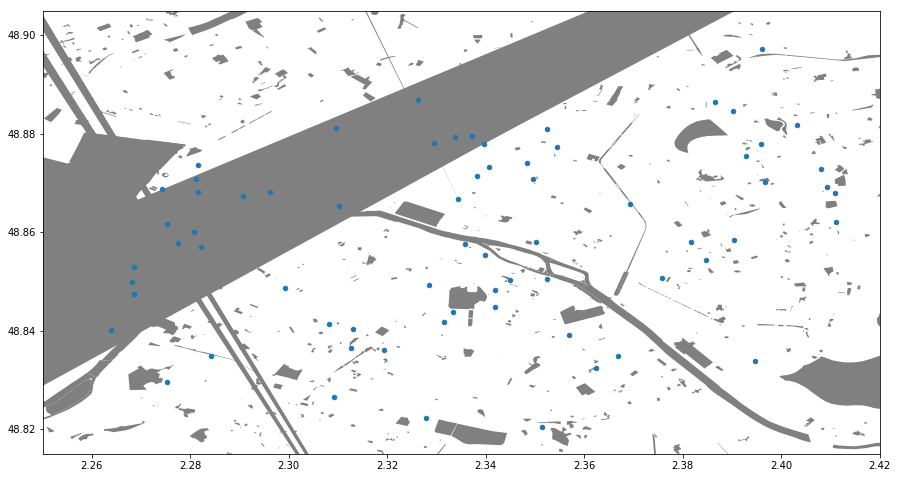

In [39]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 10))
stations.plot(ax=ax, markersize=20)
ax.set(xlim=(2.25, 2.42), ylim=(48.815, 48.905));
ax.set_axis_on()

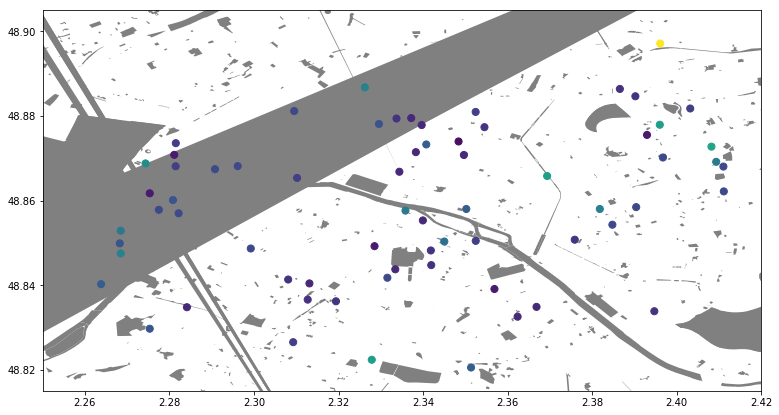

In [38]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 7))
stations.plot(ax=ax, column='numbikesavailable', markersize=50)#, legend=True)
ax.set(xlim=(2.25, 2.42), ylim=(48.815, 48.905));
ax.set_axis_on()

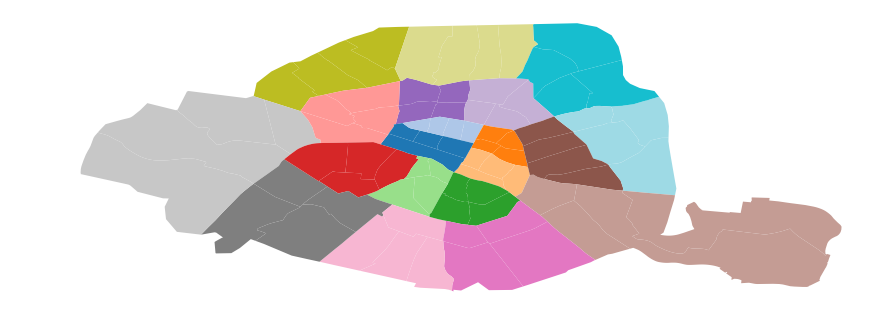

In [19]:
ax = quartiers.plot(column='n_sq_ar', categorical=True, cmap='tab20', figsize=(15, 8))
ax.set_axis_off()

In [47]:
stations.head()

,numbikesavailable,last_reported,station_id,is_installed,is_renting,numdocksavailable,is_returning,capacity,name,lon,lat,geometry
0,12,1517662974,35101194,1,1,18,1,NaN,None,NaN,NaN,None
1,2,1517651035,37936869,1,1,33,1,NaN,None,NaN,NaN,None
2,7,1517662956,7261,1,1,13,1,20.0,Athènes - Clichy,2.32956,48.878114,POINT (2.32956021946 48.8781137879)
3,6,1517662849,7304,1,1,8,1,14.0,Bassano - Iéna,2.29615,48.868145,POINT (2.29614960099 48.8681445105)
4,2,1517662797,39149651,1,1,56,1,NaN,None,NaN,NaN,None


In [48]:
counts = stations.groupby('l_qu').size()

KeyError: 'l_qu'

In [49]:
quartiers = quartiers.merge(counts.reset_index(name='number_bike_stations'))

NameError: name 'counts' is not defined

In [50]:
quartiers.head()

,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry
0,750000010,2139.625388,50,2139.535591,10,271750.323937,750000003,7510302,Enfants-Rouges,3,"POLYGON ((2.367101341254551 48.86162755885409,..."
1,750000016,3283.163371,56,3282.999717,16,378252.153674,750000004,7510404,Notre-Dame,4,"POLYGON ((2.361313701339139 48.84858030437791,..."
2,750000018,4052.729521,58,4052.473226,18,798389.398463,750000005,7510502,Jardin-des-Plantes,5,"POLYGON ((2.364561460891576 48.84365746114398,..."
3,750000025,3827.253353,7,3827.053421,25,826559.436780,750000007,7510701,Saint-Thomas-d'Aquin,7,"POLYGON ((2.322133508640103 48.84924973446431,..."
4,750000035,2786.541926,17,2786.448978,35,417335.080621,750000009,7510903,Faubourg-Montmartre,9,"POLYGON ((2.340255299125085 48.87660144727086,..."


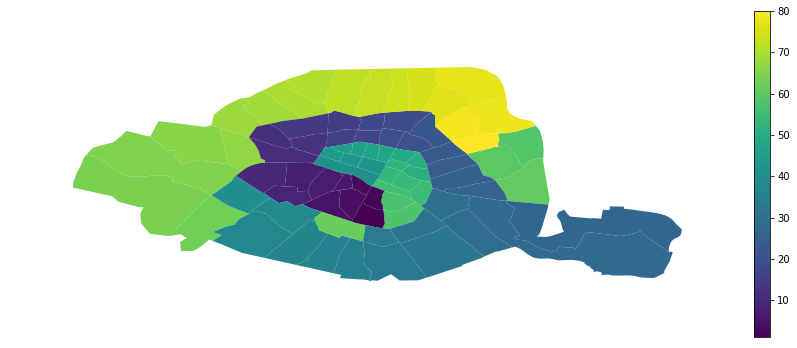

In [84]:
ax = quartiers.plot(column='objectid', figsize=(15, 6), legend=True)
ax.set_axis_off()

In [85]:
quartiers['number_bike_stations'] = quartiers['objectid'] / quartiers.geometry.area

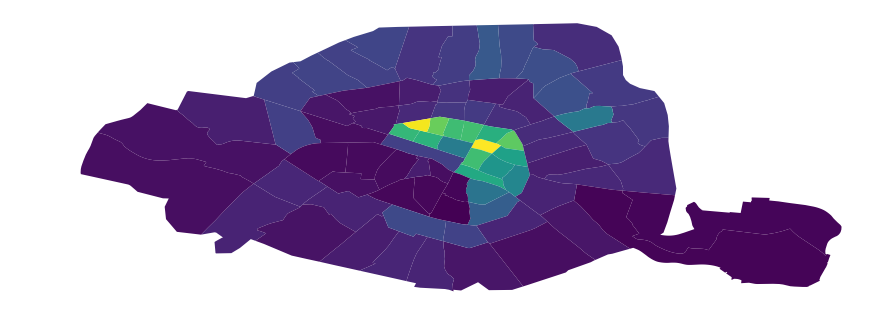

In [86]:
ax = quartiers.plot(column='number_bike_stations', figsize=(15, 6))
ax.set_axis_off()

In [54]:
stations.crs

{'init': 'epsg:4326'}

In [55]:
stations.geometry.head(3)

0                                   None
1                                   None
2    POINT (2.32956021946 48.8781137879)
Name: geometry, dtype: object

In [60]:
quartiers2 = quartiers.to_crs(epsg=32631)

In [61]:
(quartiers2.geometry.area / 1000**2)

0     0.271603
1     0.378054
2     0.797983
3     0.826127
4     0.417104
5     0.500154
6     0.471852
7     0.608698
8     0.929117
9     1.901972
10    0.868538
11    1.294254
12    1.464259
13    1.377745
14    0.213201
15    0.293207
16    0.860867
17    0.807456
18    0.716690
19    7.201383
20    2.230432
21    1.357300
22    1.784082
23    0.273549
24    2.374831
25    2.607729
26    5.475037
27    1.423272
28    0.277991
29    0.367532
        ...   
50    1.235274
51    1.180965
52    2.827822
53    1.477546
54    1.486139
55    1.598127
56    1.125644
57    1.904462
58    1.346754
59    1.284961
60    0.243418
61    0.703275
62    0.282132
63    1.073169
64    1.381170
65    0.796153
66    0.760312
67    1.181811
68    0.837539
69    1.171460
70    3.042683
71    0.691725
72    0.412237
73    0.269311
74    0.187910
75    1.834668
76    0.806119
77    6.380679
78    1.652756
79    1.088591
Length: 80, dtype: float64

In [29]:
urban_atlas_full = geopandas.read_file("fr001l_paris.shp")
x, y = 3760000, 2890000
us_subset = urban_atlas_full.cx[x-8000 : x+8000, y-8000 : y+8000].copy()
area = Polygon([(x-8000, y-8000), (x+8000, y-8000), (x+8000, y+8000), (x-8000, y+8000)])
us_subset['geometry'] = us_subset.geometry.intersection(area)
us_subset.to_file("fr001l_paris.shp")

In [31]:
us = geopandas.read_file("fr001l_paris.shp")

In [32]:
us.head()

,FID,geometry
0,0,"POLYGON ((3763476.757668196 2882372.206915549,..."
1,1,"POLYGON ((3755750.795373401 2890571.441747018,..."
2,2,"POLYGON ((3759045.014574341 2894223.898634031,..."
3,3,"POLYGON ((3763468.876496253 2889310.004122872,..."
4,4,"POLYGON ((3756953.575115261 2891043.84315913, ..."


In [37]:
us.crs

{}

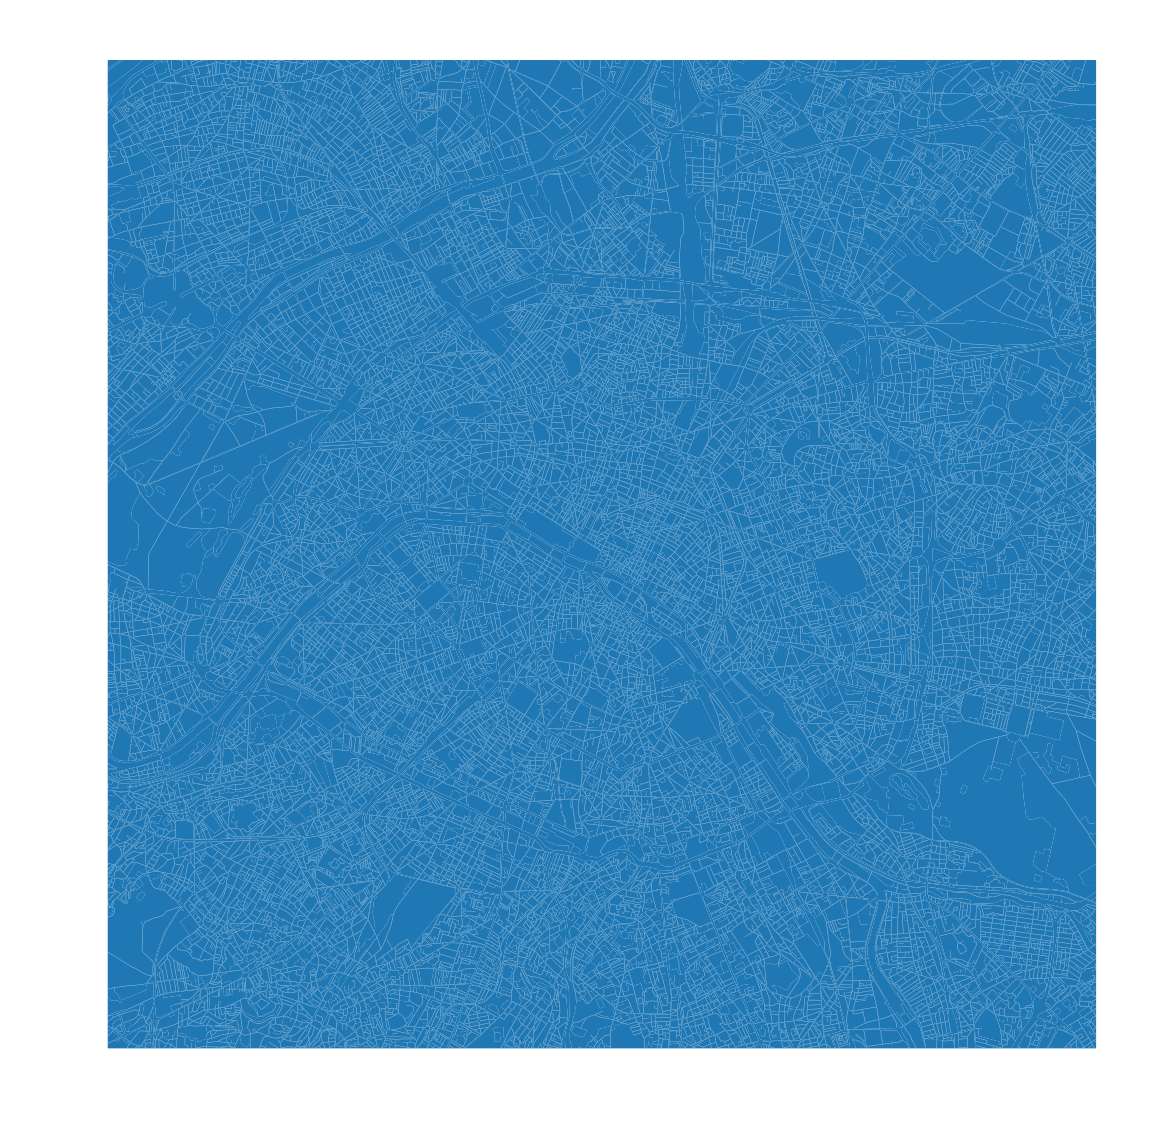

In [38]:
ax = us.plot(figsize=(20,20))
ax.set_axis_off()

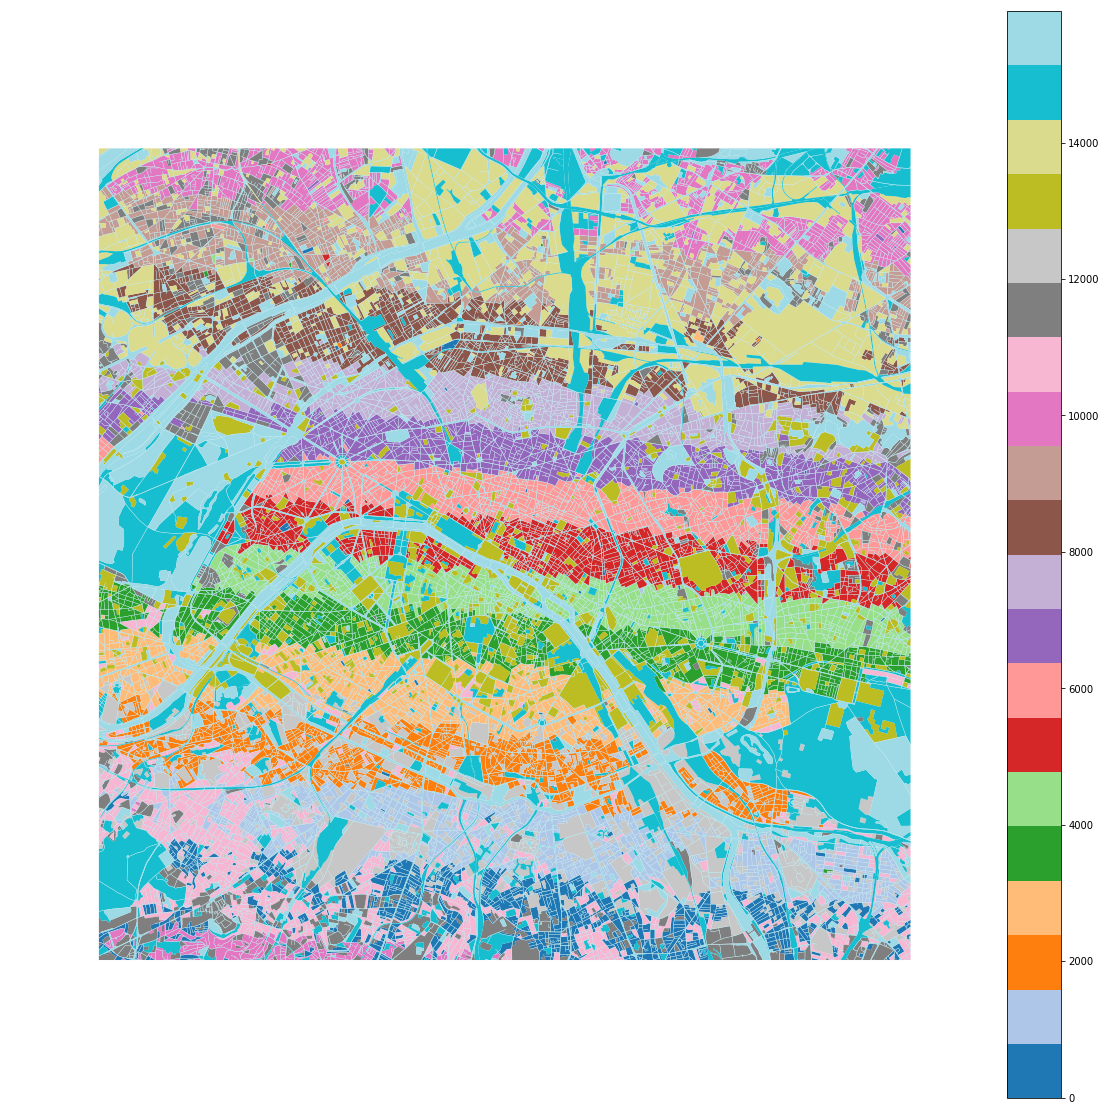

In [39]:
ax = us.plot(column='FID', figsize=(20,20), legend=True, cmap='tab20')
ax.set_axis_off()

In [42]:
pd.options.display.max_rows = 60

In [44]:
us.FID.value_counts()

2047     1
6790     1
12963    1
15010    1
8865     1
10912    1
4759     1
6806     1
661      1
2708     1
12947    1
14994    1
8849     1
10896    1
4743     1
645      1
10736    1
2692     1
12931    1
14978    1
8833     1
10880    1
4727     1
6774     1
629      1
2676     1
12915    1
14962    1
8817     1
10864    1
        ..
3419     1
11551    1
1370     1
7513     1
5464     1
11599    1
9550     1
15693    1
13644    1
3403     1
1354     1
7497     1
5448     1
11583    1
9534     1
15677    1
13628    1
3387     1
1338     1
7481     1
5432     1
11567    1
9518     1
15661    1
13612    1
3371     1
1322     1
7465     1
5416     1
0        1
Name: FID, Length: 15935, dtype: int64

In [46]:
us.groupby('FID')['geometry'].agg(lambda x: x.area.sum()).sort_values(ascending=False)

FID
15884    1.337201e+07
15844    7.619002e+06
15870    3.533770e+06
14868    2.716613e+06
15899    2.223694e+06
15842    2.098676e+06
15845    1.403575e+06
15511    1.237215e+06
13954    1.134921e+06
15148    9.983894e+05
14536    9.582289e+05
14754    8.557977e+05
15018    7.674650e+05
12232    7.034558e+05
15898    6.714059e+05
14517    6.594250e+05
15563    6.451948e+05
14520    6.318414e+05
14850    6.229535e+05
13624    6.032966e+05
14462    5.820618e+05
15082    5.761220e+05
14467    5.457519e+05
15885    4.932393e+05
15046    4.836317e+05
15136    4.829174e+05
14899    4.705926e+05
13164    4.415249e+05
14413    4.377913e+05
15575    4.123000e+05
             ...     
11615    6.428291e+01
10631    6.261970e+01
47       6.244837e+01
15861    6.035199e+01
38       5.900454e+01
15848    4.766237e+01
11690    4.302873e+01
15868    3.652102e+01
6837     3.037112e+01
15928    2.903738e+01
3574     2.394063e+01
15858    2.109743e+01
27       1.986655e+01
15907    1.836695e+01
15882 